In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
y = df.iloc[:100,4].values

In [5]:
y = np.where(y == 'Iris-setosa',-1,1)

In [7]:
x = df.iloc[:100,[0,2]]

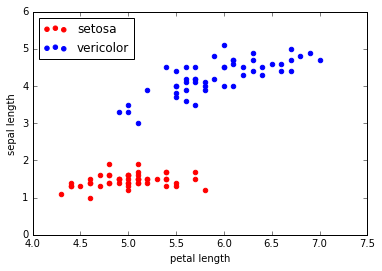

In [10]:
plt.scatter(x.iloc[:50,0],x.iloc[:50,1],color = 'red',marker = 'o',label = 'setosa')
plt.scatter(x.iloc[50:,0],x.iloc[50:,1],color = 'blue',marker = 'o',label = 'vericolor')
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.legend(loc = "upper left")
plt.show()

In [12]:
##第二章
#使用Sklearn框架来训练数据集
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,[2,3]]
Y = iris["target"]
np.unique(Y)

array([0, 1, 2])

In [14]:
#数据分割成训练集和测试集
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)
#数据标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)      #计算出训练集中每一特征的平均值和方差
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#用sklearn框架训练一个机器学习算法
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40,eta0 = 0.1,random_state = 0)
ppn.fit(X_train_std,Y_train)
y_pred = ppn.predict(X_test_std)
#对预测的数据进行评价
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" % accuracy_score(Y_test,y_pred))

accuracy: 0.91


In [20]:
#用logistic回归来预测数据
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state = 0)
lr.fit(X_train_std,Y_train)
y_pred = lr.predict(X_test_std)
print("accuracy: %.2f"%accuracy_score(Y_test,y_pred))
print("三种花的概率:{}".format(lr.predict_proba(X_test_std[0,:])))

accuracy: 0.98
三种花的概率:[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
